                                                                            Dilruba Benzerler 090190309
                                                                            Kaan Kaymaz 090180333

# Sentiment Analysis in IMDB Review

## Introduction

In the subject selection of the project, it was decided to use sentiment analysis models based on the idea of examining the IMBD Review data.

Since it was decided that it was insufficient to decide that the reviews were only positive or negative, it was thought that the use of topic modeling could enrich the project.

After the subjects were decided, it was decided that some libraries such as (SVM, LDA, NLTK, KMeans, Sentiment Intensity Analyzer) would be appropriate to use during the research phase.

New label and topic classes were created using models and libraries. And analyzed by looking at their scores.

## Metodology

Some library, model, and function names and functions used during the project are given below:

    1) BeautifulSoup: Beautiful Soup is a Python library that is used for web scraping purposes. It is designed to make it easy to navigate, search, and modify the parse tree of an HTML or XML document. With Beautiful Soup, you can parse an HTML or XML document and extract the data that you need.
    
    2) SentimentIntensityAnalyzer: SentimentIntensityAnalyzer is a class within the vaderSentiment library in Python that is used for performing sentiment analysis. Sentiment analysis is the process of determining the sentiment or emotion behind a given piece of text. The "SentimentIntensityAnalyzer" class provides a convenient interface for analyzing the sentiment of a given piece of text and generating a score for each of four sentiment categories: positive, negative, neutral, and compound.
    
    3) NLTK: The Natural Language Toolkit (NLTK) is a Python library for working with human language data (text). It provides a wide range of tools for tasks such as tokenization (splitting text into individual words and punctuation), part-of-speech tagging (labeling words as nouns, verbs, etc.), and parsing (analyzing the structure of a sentence). NLTK also includes a large collection of text data (corpora) and lexical resources (such as word lists and wordnet) that can be used for natural language processing tasks.
    
    4) LDA: Latent Dirichlet Allocation (LDA) is a technique for identifying the underlying themes or topics in a collection of documents. It is a probabilistic model that represents each document as a mixture of a fixed number of topics and each word as generated from one of the document's topics. LDA is used for tasks such as information retrieval, document classification, and topic summarization. It can also be used to understand the latent structure of a collection of documents and discover the main themes or topics in the documents.
    
    5) SVM: Support Vector Machines (SVMs) are a type of machine learning algorithm that can be used to classify data. They find the best line or plane to separate different classes in the data. The line or plane is chosen so that it is as far as possible from all the data points. The points closest to the line or plane are called "support vectors." SVMs are often used for classification tasks and can handle high-dimensional data well, but they can be sensitive to the way the data is split and can be slow to train on large datasets.

### Base Configurations

In [1]:
import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup
import json
import opendatasets as od
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import gensim
from gensim import corpora, models, similarities
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import classification_report, confusion_matrix

# Experiment

In [2]:
od.download("https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/download?datasetVersionNumber=1")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kaankaymaz
Your Kaggle Key: ········


100%|██████████████████████████████████████| 25.7M/25.7M [00:02<00:00, 11.1MB/s]


In [3]:
data = pd.read_csv("IMDB Dataset.csv")

In [4]:
df = pd.get_dummies(data, columns = ['sentiment'])
df.drop("sentiment_negative",axis=1,inplace=True)

In [5]:
df.rename(columns={"review":"text","sentiment_positive":"label"},inplace=True)

In [6]:
df = df[0:1000]

In [7]:
df["text"]=[BeautifulSoup(i).get_text() for i in df['text']]
# To clean html tags there were called BeautifulSoup function.

In [8]:
sentiment = SentimentIntensityAnalyzer()

In [9]:
sentiment.polarity_scores(df["text"][0])

{'neg': 0.182, 'neu': 0.752, 'pos': 0.066, 'compound': -0.9916}

**SentimentIntensityAnalyzer returns 'compound' score and this score gives is used to decide whether it is positive or negative. If the compound is negative, the sentence is labeled negative, if it is positive, it is labeled positive.**

In [10]:
def labeler(sentiment_dict):
    if sentiment_dict['compound'] >= 0.05 :
        return("Positive")
    else :
        return("Negative")

In [11]:
list_label = []
for i in range(len(df)):
    sentiment_dict = sentiment.polarity_scores(df["text"][i])
    list_label.append(labeler(sentiment_dict))
df["label_analyzer"] = list_label
df["label_analyzer"].replace("Negative","0",inplace=True)
df["label_analyzer"].replace("Positive","1",inplace=True)
df["label_analyzer"] = df["label_analyzer"].astype('int32')

**SentimentIntensityAnalyzer is a pre-trained machine learning model that is part of the Natural Language Toolkit (NLTK), a collection of libraries and resources for natural language processing (NLP) in Python.**

**The SentimentIntensityAnalyzer is used to analyze the sentiment (positive, negative, or neutral) of a piece of text. It does this by assigning a score to each piece of text based on the words and phrases it contains, as well as various other factors such as punctuation and capitalization. The score is a numerical value that ranges from -1 (strongly negative) to 1 (strongly positive), with 0 indicating neutral sentiment.**

In [12]:
print("Similarity ratio between data's own label and label analyzer:",(df["label"] == df["label_analyzer"]).sum()/len(df))

Similarity ratio between data's own label and label analyzer: 0.723


In [13]:
def cluster_text(text):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(stop_words={'english'})
    X = vectorizer.fit_transform(text)

    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    Sum_of_squared_distances = []
    K = range(2,10)
    for k in K:
        km = KMeans(n_clusters=k, max_iter=200, n_init=10)
        km = km.fit(X)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    print('How many clusters do you want to use?')
    true_k = int(input())
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
    model.fit(X)

    labels=model.labels_
    clusters=pd.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
    df["label_kmeans"]=clusters["cluster"]
    
    for i in range(true_k):
        print(clusters[clusters['cluster'] == i])
    return 

**Using the KMeans algorithm, the texts are classified according to their topic and assigned to the "label_kmeans" column.**

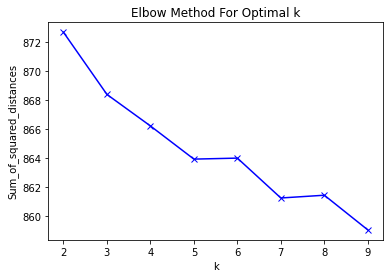

How many clusters do you want to use?
7
                                                 title  cluster
44   This movie struck home for me. Being 29, I rem...        0
259  Back in 1994, I had a really lengthy vacation ...        0
534  I just got this video used and I was watching ...        0
660  I was never so bored in my life. Hours of pret...        0
929  I saw this movie in a theater while on vacatio...        0
                                                 title  cluster
6    I sure would like to see a resurrection of a u...        1
9    If you like original gut wrenching laughter yo...        1
22   What an absolutely stunning movie, if you have...        1
62   So let's begin!)))The movie itself is as origi...        1
97   Well, I like to watch bad horror B-Movies, cau...        1
..                                                 ...      ...
960  This was my first Gaspar Noe movie I've watche...        1
965  I never want to see this movie again!Not only ...        1


In [14]:
cluster_text(df["text"])

In [15]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# Please run the code
def rid_of_specials(words):
    new= ''
    for i in range(len(words)):
        a = re.sub('[^A-Za-z]+', ' ', words[i]).lower()
        new += a
    return new

In [17]:
df['text'] = [rid_of_specials(i) for i in df['text']]

**The texts of the data contain some numbers, punctuations, and capitalized words that make it difficult to work with the data. These need to be gotten rid of. There is written a function to get rid of them. The function takes the texts as input and uses the "sub" function of the "Regular Expression" library to bring the words or expressions we want to the unwanted places in the texts. Since we wanted to get rid of punctuation marks, we entered the "[^A-Za-z]" command inside the function, which removes punctuations. And we filled them with space. At the end, we used the ".lower()" function because we wanted to make the sentence lowercase.**

In [21]:
tokenized=[word_tokenize(i) for i in df['text']]

**Here the tokenization process is done. Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning.**

In [24]:
#Step 1
stop_words = set(stopwords.words('english'))
#Step 2
stopped = [[i for i in j if i not in stop_words] for j in tokenized]

**A stop word is a commonly used word that a search engine is programmed to ignore both when indexing search entries and when retrieving them as a result. Words like ["a", "an", "the", "this", "that", "is", "it", "to", "and"] are examples. These words are not wanted to take up space in our database or take up valuable processing time. So there is ran a function to remove those words. English stop words in "Step 1" are given by the list. In "Step2", there were created a nested for loop to search for these words among the words we have separated above as "tokenized".**

In [29]:
lemmatizer = WordNetLemmatizer()

lemmatized = [[lemmatizer.lemmatize(i) for i in j] for j in stopped]

prepeared_sentence= [' '.join(j) for j in lemmatized]

**Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. Examples: rocks -> rock, better -> good, feet -> foot, (am, are, is) -> be.
That is why there is called WordNetLemmatizer function and texts were lemmatized.**

In [30]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(prepeared_sentence)

feature_names = vectorizer.get_feature_names()

text_vectorized = pd.DataFrame(X.toarray(), columns = feature_names)

**Finally, the CountVectorizer function was called to make the lemmatized words numerical and our text data was made numerical. This numericized data is assigned to a dataframe named text_vectorized.**

In [31]:
text_vectorized

,aaargh,aaliyah,aamir,aaron,ab,abandon,abandoned,abba,abbey,abbot,...,zoo,zoology,zoom,zooming,zp,zu,zucker,zulu,zwick,zzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
dictionary = corpora.Dictionary(lemmatized)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(tokens) for tokens in lemmatized]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 3), (23, 1), (24, 2), (25, 1), (26, 2), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 4), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 4), (68, 1), (69, 2), (70, 1), (71, 2), (72, 1)]]


**Using the above processes, it was found that the number of unique words formed as a result of the lemmatization process was 73. And these words were divided into 73 separate classes for use in the model and assigned to the "corpus" variable.**

In [33]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 7, id2word=dictionary, passes=15)
ldamodel.save('mOdel.gensim')
topics = ldamodel.print_topics(num_words=30) 

**Here, too, it can be seen what the unique 73 words are.**

In [34]:
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('appeal', 1),
  ('around', 1),
  ('audience', 1),
  ('away', 2),
  ('become', 1),
  ('called', 1),
  ('city', 2),
  ('class', 1),
  ('classic', 1),
  ('death', 1),
  ('developed', 1),
  ('drug', 1),
  ('due', 2),
  ('episode', 2),
  ('ever', 1),
  ('exactly', 1),
  ('experience', 1),
  ('face', 1),
  ('fact', 1),
  ('far', 1),
  ('first', 2),
  ('focus', 1),
  ('forget', 3),
  ('front', 1),
  ('get', 2),
  ('given', 1),
  ('go', 2),
  ('got', 1),
  ('happened', 1),
  ('high', 2),
  ('home', 1),
  ('italian', 1),
  ('kill', 1),
  ('lack', 1),
  ('level', 1),
  ('main', 1),
  ('many', 1),
  ('may', 1),
  ('mentioned', 1),
  ('mess', 1),
  ('middle', 1),
  ('nasty', 1),
  ('never', 1),
  ('order', 1),
  ('picture', 1),
  ('pretty', 1),
  ('pull', 1),
  ('ready', 1),
  ('regard', 1),
  ('reviewer', 1),
  ('right', 2),
  ('romance', 1),
  ('saw', 1),
  ('say', 2),
  ('scene', 1),
  ('set', 1),
  ('sex', 1),
  ('show', 4),
  ('side', 1),
  ('state', 1),
  ('street', 1),
  ('taste', 1),
  

In [35]:
def dominant_topic(ldamodel,corpus,content):
#Function to find the dominant topic in each query
    sent_topics_df = pd.DataFrame()
    # Get main topic in each query
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
# Get the Dominant topic, Perc Contribution and Keywords for each query
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # =&gt; dominant topic
                wp = ldamodel.show_topic(topic_num,topn=30)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(content)#noisy data
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
df_dominant_topic = dominant_topic(ldamodel=ldamodel, corpus=corpus, content=df["text"])
df_dominant_topic

,Dominant_Topic,Perc_Contribution,Topic_Keywords,text
0,0,0.4793,"show, character, would, episode, time, good, g...",one of the other reviewers has mentioned that ...
1,3,0.9828,"life, scene, well, character, time, also, stor...",a wonderful little production the filming tec...
2,5,0.9834,"like, really, good, bad, funny, get, see, thin...",i thought this was a wonderful way to spend ti...
3,6,0.9785,"like, best, game, good, get, would, make, life...",basically there s a family where a little boy ...
4,3,0.7856,"life, scene, well, character, time, also, stor...",petter mattei s love in the time of money is...
...,...,...,...,...
995,2,0.9865,"see, story, world, time, like, character, woul...",nothing is sacred just ask ernie fosselius t...
996,2,0.8701,"see, story, world, time, like, character, woul...",i hated it i hate self aware pretentious inan...
997,1,0.8978,"like, even, make, horror, get, bad, thing, wou...",i usually try to be professional and construct...
998,5,0.9678,"like, really, good, bad, funny, get, see, thin...",if you like me is going to see this in a film ...


In [36]:
df["label_lda"] = df_dominant_topic["Dominant_Topic"]

**A new label column "label_lda" has been created using the above model.**

In [37]:
cv = CountVectorizer(max_df = 0.9, min_df=2, stop_words="english")

In [38]:
dtm = cv.fit_transform(df["text"])

**The LDA model was used here as well, but the LDA model in the above model is used as "LdaModel" from the gensim.models library, while here it is used as "LatentDirichletAllocation" from the scikit learn library. And they both create different labels.**

In [39]:
LDA = LatentDirichletAllocation(n_components=7, random_state=42)

In [40]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

**Below, it can be seen in more detail according to which words the topics are separated.**

In [41]:
for i,topic in enumerate(LDA.components_):
    print(f"THE TOP 15 WORDS FOR TOPIC #{i}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print("\n")
    print("\n")

THE TOP 15 WORDS FOR TOPIC #0
['really', 'does', 'scenes', 'think', 'people', 'good', 'man', 'way', 'films', 'just', 'time', 'story', 'like', 'movie', 'film']




THE TOP 15 WORDS FOR TOPIC #1
['woman', 'man', 'way', 'old', 'life', 'love', 'story', 'great', 'good', 'really', 'just', 'best', 'movie', 'like', 'film']




THE TOP 15 WORDS FOR TOPIC #2
['new', 'young', 'way', 'does', 'really', 'characters', 'time', 'good', 'people', 'like', 'story', 'life', 'just', 'movie', 'film']




THE TOP 15 WORDS FOR TOPIC #3
['great', 'people', 'watch', 'story', 'don', 'really', 'time', 'think', 'movies', 'bad', 'good', 'film', 'like', 'just', 'movie']




THE TOP 15 WORDS FOR TOPIC #4
['love', 'make', 'performance', 'story', 'character', 'good', 'life', 'really', 'movie', 'great', 'just', 'way', 'time', 'like', 'film']




THE TOP 15 WORDS FOR TOPIC #5
['wilson', 'time', 'great', 'just', 'production', 'trek', 'flynn', 'visconti', 'john', 'little', 'jane', 'seen', 'scene', 'charlie', 'like']




THE

In [42]:
topic = LDA.transform(dtm)

In [43]:
df["label_lda_2"] = topic.argmax(axis=1)

In [44]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Basic function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [45]:
classifier = LinearSVC()

In [46]:
X = df["text"]
y = df["label"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [47]:
pipe_countvect = Pipeline([("cleaner", predictors()),
                 ('vectorizer', cv),
                 ('classifier', classifier)])

pipe_countvect.fit(X_train,y_train)

sample_prediction = pipe_countvect.predict(X_test)

liste1 = []
liste2 = []
#for (sample,pred) in zip(X_test,sample_prediction):
    #print(sample,"Prediction=>",pred)       
        #When these comment lines are executed, the label is displayed opposite each text line.

**Using the Pipeline, the text input is first cleared with "predictors". Data formed after vectorizing with CountVectorizer.Then, with using Support Vector Machine algorithm classes are created**

In [48]:
print("Accuracy: ",pipe_countvect.score(X_test,y_test))
print("Accuracy: ",pipe_countvect.score(X_test,sample_prediction))
# Accuracy
print("Accuracy: ",pipe_countvect.score(X_train,y_train))

Accuracy:  0.844
Accuracy:  1.0
Accuracy:  1.0


In [49]:
liste_pipe = []
liste_str = []

In [50]:
for i in range(len(df)):
    liste_pipe.append(pipe_countvect.predict([df["text"][i]]))

In [51]:
for i in range(len(df)):
    liste_str.append(np.array2string(liste_pipe[i], precision=2, separator=',',
                      suppress_small=True))

In [52]:
df["label_pipeline"]=liste_str

In [53]:
df["label_pipeline"]=df["label_pipeline"].str.replace("[","")
df["label_pipeline"]=df["label_pipeline"].str.replace("]","")
df["label_pipeline"]=df["label_pipeline"].astype("int")

In [54]:
print("Similarity ratio between data's own label and label_pipeline:",(df["label"] == df["label_pipeline"]).sum()/len(df))

Similarity ratio between data's own label and label_pipeline: 0.961


**Classes created with Pipeline are assigned to a column called "label_pipeline".**

In [55]:
pipe_countvect.predict(["You are bad at this game."]) 
#By trying examples here, there can better understand how the model works.

array([0], dtype=uint8)

**As can be seen below, we finally have 3 binary classes and 3 multiclass classes.**

In [56]:
df

,text,label,label_analyzer,label_kmeans,label_lda,label_lda_2,label_pipeline
0,one of the other reviewers has mentioned that ...,1,0,4,0,4,1
1,a wonderful little production the filming tec...,1,1,6,3,1,1
2,i thought this was a wonderful way to spend ti...,1,1,2,5,3,1
3,basically there s a family where a little boy ...,0,0,5,6,6,1
4,petter mattei s love in the time of money is...,1,1,6,3,6,1
...,...,...,...,...,...,...,...
995,nothing is sacred just ask ernie fosselius t...,1,1,4,2,4,1
996,i hated it i hate self aware pretentious inan...,0,0,5,2,0,0
997,i usually try to be professional and construct...,0,0,3,1,2,0
998,if you like me is going to see this in a film ...,0,0,1,5,3,0


# Analysis

**//Multi Class Labels Scoring\\\**

In [57]:
def multi_class_labels_accuracy_score_logistic_regression(label_name):
    X = text_vectorized
    y = df[label_name]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accurcy score of",label_name,"column:",accuracy)

In [58]:
multi_class_labels_accuracy_score_logistic_regression('label_kmeans')
multi_class_labels_accuracy_score_logistic_regression('label_lda')
multi_class_labels_accuracy_score_logistic_regression('label_lda_2')

Accurcy score of label_kmeans column: 0.512
Accurcy score of label_lda column: 0.612
Accurcy score of label_lda_2 column: 0.496


In [59]:
def multi_class_labels_accuracy_score_decision_trees(label_name):
    X = text_vectorized
    y = df[label_name]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
    dtc = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=42)
    dtc.fit(X_train, y_train)
    y_pred_dt = dtc.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    print("Accuracy_score of",label_name,"column:",accuracy_dt)

In [60]:
multi_class_labels_accuracy_score_decision_trees('label_kmeans')
multi_class_labels_accuracy_score_decision_trees('label_lda')
multi_class_labels_accuracy_score_decision_trees('label_lda_2')

Accuracy_score of label_kmeans column: 0.328
Accuracy_score of label_lda column: 0.288
Accuracy_score of label_lda_2 column: 0.448


In [61]:
def multi_class_labels_accuracy_score_random_forest_classifier(label_name):
    X = text_vectorized
    y = df[label_name]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
    rfc = RandomForestClassifier(n_estimators=50, max_features="auto",criterion = 'gini', random_state=44)
    rfc.fit(X_train, y_train)
    y_pred_rfc = rfc.predict(X_test)
    accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
    print("Accuracy_score of",label_name,"column:",accuracy_rfc)

In [62]:
multi_class_labels_accuracy_score_random_forest_classifier('label_kmeans')
multi_class_labels_accuracy_score_random_forest_classifier('label_lda')
multi_class_labels_accuracy_score_random_forest_classifier('label_lda_2')

Accuracy_score of label_kmeans column: 0.44
Accuracy_score of label_lda column: 0.348
Accuracy_score of label_lda_2 column: 0.444


**From the scores, it can be stated that the algorithms used for topic modeling do not give good enough results or do not fit the data correctly.**

**//Binary Labels Scoring\\\**

**Accuracy Score and F1 Score of Naive Bayes**

In [63]:
def scores_of_naive_bayes(label_name):
    X = text_vectorized
    y = df[label_name]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
    gnb = GaussianNB()
    gnb.fit(X_train,y_train)
    y_pred_nb = gnb.predict(X_test)
    f1_score_nb = f1_score(y_test,y_pred_nb)
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    print("f1_score_of",label_name,"column:",f1_score_nb,"accuracy_score:",label_name,"column:",accuracy_nb)

In [64]:
scores_of_naive_bayes("label_analyzer")
scores_of_naive_bayes("label")
scores_of_naive_bayes("label_pipeline")

f1_score_of label_analyzer column: 0.7298050139275767 accuracy_score: label_analyzer column: 0.612
f1_score_of label column: 0.6160337552742615 accuracy_score: label column: 0.636
f1_score_of label_pipeline column: 0.6339622641509434 accuracy_score: label_pipeline column: 0.612


**Accuracy Score and F1 Score of Decision Trees**

In [65]:
def scores_of_decision_trees(label_name):
    X = text_vectorized
    y = df[label_name]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
    dtc = DecisionTreeClassifier(random_state=0)
    dtc.fit(X_train,y_train)
    y_pred_dt = dtc.predict(X_test)
    f1_score_dt = f1_score(y_test,y_pred_dt)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    print("f1_score_of",label_name,"column:",f1_score_dt,"accuracy_score:",label_name,"column:",accuracy_dt)
    print(classification_report(y_test, y_pred_dt),"\n")

In [66]:
scores_of_decision_trees("label_analyzer")
scores_of_decision_trees("label")
scores_of_decision_trees("label_pipeline")

f1_score_of label_analyzer column: 0.7592592592592593 accuracy_score: label_analyzer column: 0.688
              precision    recall  f1-score   support

           0       0.58      0.53      0.56        92
           1       0.74      0.78      0.76       158

    accuracy                           0.69       250
   macro avg       0.66      0.66      0.66       250
weighted avg       0.68      0.69      0.68       250
 

f1_score_of label column: 0.7068273092369477 accuracy_score: label column: 0.708
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       124
           1       0.72      0.70      0.71       126

    accuracy                           0.71       250
   macro avg       0.71      0.71      0.71       250
weighted avg       0.71      0.71      0.71       250
 

f1_score_of label_pipeline column: 0.6554621848739496 accuracy_score: label_pipeline column: 0.672
              precision    recall  f1-score   support

        

**Accuracy Score and F1 Score of Random Forest Classifier**

In [67]:
def scores_of_random_forest_classifier(label_name):
    X = text_vectorized
    y = df[label_name]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
    rfc = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
    rfc.fit(X_train, y_train)
    y_pred_rfc = rfc.predict(X_test)
    f1_score_rfc = f1_score(y_test,y_pred_rfc)
    accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
    print("f1_score_of",label_name,"column:",f1_score_rfc,"accuracy_score:",label_name,"column:",accuracy_rfc)

In [68]:
scores_of_random_forest_classifier("label_analyzer")
scores_of_random_forest_classifier("label")
scores_of_random_forest_classifier("label_pipeline")

f1_score_of label_analyzer column: 0.8404255319148937 accuracy_score: label_analyzer column: 0.76
f1_score_of label column: 0.7654320987654321 accuracy_score: label column: 0.772
f1_score_of label_pipeline column: 0.7306273062730627 accuracy_score: label_pipeline column: 0.708


**Accuracy Score and F1 Score of Random Gradient Boosting Classifier**

In [69]:
def scores_of_gradient_boosting_classifier(label_name):
    X = text_vectorized
    y = df[label_name]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
    gbc = GradientBoostingClassifier()
    gbc.fit(X_train,y_train)
    y_pred_gbm = gbc.predict(X_test)
    f1_score_gbm = f1_score(y_test,y_pred_gbm)
    accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
    print("f1_score_of",label_name,"column:",f1_score_gbm,"accuracy_score:",label_name,"column:",accuracy_gbm)

In [70]:
scores_of_gradient_boosting_classifier("label_analyzer")
scores_of_gradient_boosting_classifier("label")
scores_of_gradient_boosting_classifier("label_pipeline")

f1_score_of label_analyzer column: 0.8022922636103151 accuracy_score: label_analyzer column: 0.724
f1_score_of label column: 0.7452471482889734 accuracy_score: label column: 0.732
f1_score_of label_pipeline column: 0.7741935483870968 accuracy_score: label_pipeline column: 0.748


**It can be said that binary classes are better created than multi class labels. And it can be seen that the classes created with "SentimentIntensityAnalyzer" in particular give good results in all models.**

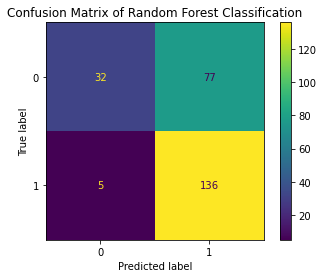

In [71]:
X = text_vectorized
y = df["label_analyzer"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
rfc = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rfc.fit(X_train, y_train)
plot_confusion_matrix(rfc, X_test, y_test) 
plt.title("Confusion Matrix of Random Forest Classification")
plt.show()

**There have been made 30(+-) positive predicted and true, 50(+-) positive predicted and false, 10(+-) negative predicted and false, 150(+-) negative predicted and true interpretation here we made with the Random Forest Classification model.**

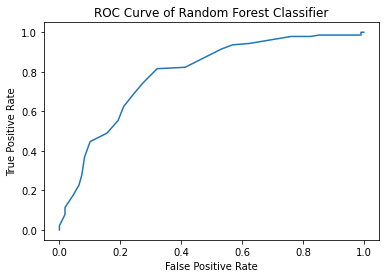

In [72]:
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.title("ROC Curve of Random Forest Classifier")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [79]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import keras
from keras.models import Sequential
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.utils import np_utils

In [123]:
def neural_network_binary_class(label_name):
    X = text_vectorized
    y = df[label_name]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
    model = Sequential()
    
    model.add(Dense(32, activation='relu',input_dim=15763))
    model.add(Dropout(0.25))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    history = model.fit(np.array(X_train),np.array(y_train),validation_split=0.25, epochs=20, batch_size=256)

In [124]:
neural_network_binary_class("label")

Epoch 1/20
3/3 [==============================] - 0s 48ms/step - loss: 0.6922 - accuracy: 0.5302 - val_loss: 0.6889 - val_accuracy: 0.6223
Epoch 2/20
3/3 [==============================] - 0s 17ms/step - loss: 0.6748 - accuracy: 0.6851 - val_loss: 0.6823 - val_accuracy: 0.6968
Epoch 3/20
3/3 [==============================] - 0s 16ms/step - loss: 0.6526 - accuracy: 0.7740 - val_loss: 0.6686 - val_accuracy: 0.7287
Epoch 4/20
3/3 [==============================] - 0s 17ms/step - loss: 0.6248 - accuracy: 0.8203 - val_loss: 0.6489 - val_accuracy: 0.7447
Epoch 5/20
3/3 [==============================] - 0s 17ms/step - loss: 0.5778 - accuracy: 0.8719 - val_loss: 0.6284 - val_accuracy: 0.7553
Epoch 6/20
3/3 [==============================] - 0s 17ms/step - loss: 0.5207 - accuracy: 0.8861 - val_loss: 0.6036 - val_accuracy: 0.7872
Epoch 7/20
3/3 [==============================] - 0s 17ms/step - loss: 0.4802 - accuracy: 0.8950 - val_loss: 0.5808 - val_accuracy: 0.8032
Epoch 8/20
3/3 [===========

In [125]:
neural_network_binary_class("label_pipeline")

Epoch 1/20
3/3 [==============================] - 0s 49ms/step - loss: 0.6995 - accuracy: 0.5231 - val_loss: 0.6871 - val_accuracy: 0.5053
Epoch 2/20
3/3 [==============================] - 0s 16ms/step - loss: 0.6592 - accuracy: 0.5979 - val_loss: 0.6789 - val_accuracy: 0.5638
Epoch 3/20
3/3 [==============================] - 0s 17ms/step - loss: 0.6254 - accuracy: 0.6512 - val_loss: 0.6699 - val_accuracy: 0.5372
Epoch 4/20
3/3 [==============================] - 0s 17ms/step - loss: 0.5843 - accuracy: 0.6922 - val_loss: 0.6718 - val_accuracy: 0.5266
Epoch 5/20
3/3 [==============================] - 0s 16ms/step - loss: 0.5497 - accuracy: 0.6886 - val_loss: 0.6722 - val_accuracy: 0.5479
Epoch 6/20
3/3 [==============================] - 0s 16ms/step - loss: 0.5227 - accuracy: 0.7420 - val_loss: 0.6611 - val_accuracy: 0.5851
Epoch 7/20
3/3 [==============================] - 0s 16ms/step - loss: 0.4811 - accuracy: 0.8274 - val_loss: 0.6560 - val_accuracy: 0.6223
Epoch 8/20
3/3 [===========

In [126]:
neural_network_binary_class("label_analyzer")

Epoch 1/20
3/3 [==============================] - 0s 49ms/step - loss: 0.6960 - accuracy: 0.4733 - val_loss: 0.6909 - val_accuracy: 0.5745
Epoch 2/20
3/3 [==============================] - 0s 16ms/step - loss: 0.6814 - accuracy: 0.6370 - val_loss: 0.6864 - val_accuracy: 0.6011
Epoch 3/20
3/3 [==============================] - 0s 16ms/step - loss: 0.6670 - accuracy: 0.6441 - val_loss: 0.6822 - val_accuracy: 0.5904
Epoch 4/20
3/3 [==============================] - 0s 16ms/step - loss: 0.6460 - accuracy: 0.6566 - val_loss: 0.6804 - val_accuracy: 0.5904
Epoch 5/20
3/3 [==============================] - 0s 17ms/step - loss: 0.6244 - accuracy: 0.6797 - val_loss: 0.6784 - val_accuracy: 0.5904
Epoch 6/20
3/3 [==============================] - 0s 16ms/step - loss: 0.5939 - accuracy: 0.7420 - val_loss: 0.6749 - val_accuracy: 0.5904
Epoch 7/20
3/3 [==============================] - 0s 16ms/step - loss: 0.5645 - accuracy: 0.7651 - val_loss: 0.6695 - val_accuracy: 0.5957
Epoch 8/20
3/3 [===========

In [108]:
def neural_network_multi_class(label_name): 
    
    X = np.array(text_vectorized)
    y = np_utils.to_categorical(df[label_name])
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
    model = Sequential()

    model.add(Dense(32, activation='relu',input_dim=15763))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    
    model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
    history = model.fit(X, y, epochs=200, batch_size=10, shuffle=True, validation_split=0.2, verbose=1)
    print("\n")
    model.evaluate(X_test,y_test)

In [110]:
neural_network_multi_class("label_kmeans")

Epoch 1/200
80/80 [==============================] - 0s 3ms/step - loss: 1.9267 - accuracy: 0.2075 - val_loss: 1.9006 - val_accuracy: 0.2100
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 1.8167 - accuracy: 0.2675 - val_loss: 1.8304 - val_accuracy: 0.2350
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 1.6926 - accuracy: 0.3275 - val_loss: 1.7642 - val_accuracy: 0.2600
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 1.5608 - accuracy: 0.3938 - val_loss: 1.7199 - val_accuracy: 0.2600
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 1.4665 - accuracy: 0.4288 - val_loss: 1.7001 - val_accuracy: 0.2800
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 1.3929 - accuracy: 0.4450 - val_loss: 1.6974 - val_accuracy: 0.2750
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 1.2881 - accuracy: 0.4863 - val_loss: 1.6547 - val_accuracy: 0.2750
Epoch 8/200
8

In [111]:
neural_network_multi_class("label_lda")

Epoch 1/200
80/80 [==============================] - 0s 3ms/step - loss: 1.9184 - accuracy: 0.2150 - val_loss: 1.8994 - val_accuracy: 0.2250
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 1.8468 - accuracy: 0.2700 - val_loss: 1.8697 - val_accuracy: 0.3050
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 1.7512 - accuracy: 0.3088 - val_loss: 1.8287 - val_accuracy: 0.3200
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 1.7008 - accuracy: 0.3088 - val_loss: 1.7945 - val_accuracy: 0.3250
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 1.6044 - accuracy: 0.3363 - val_loss: 1.7467 - val_accuracy: 0.3600
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 1.5161 - accuracy: 0.3738 - val_loss: 1.7033 - val_accuracy: 0.3650
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 1.4338 - accuracy: 0.4263 - val_loss: 1.6668 - val_accuracy: 0.4050
Epoch 8/200
8

In [109]:
neural_network_multi_class("label_lda_2")

Epoch 1/200
80/80 [==============================] - 0s 3ms/step - loss: 1.9422 - accuracy: 0.2175 - val_loss: 1.9062 - val_accuracy: 0.3800
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 1.8744 - accuracy: 0.3562 - val_loss: 1.8609 - val_accuracy: 0.4000
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 1.7828 - accuracy: 0.4125 - val_loss: 1.8191 - val_accuracy: 0.4000
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 1.7083 - accuracy: 0.4313 - val_loss: 1.7718 - val_accuracy: 0.4000
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 1.6310 - accuracy: 0.4550 - val_loss: 1.7279 - val_accuracy: 0.4000
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 1.5354 - accuracy: 0.4938 - val_loss: 1.6868 - val_accuracy: 0.4050
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 1.4370 - accuracy: 0.5213 - val_loss: 1.7014 - val_accuracy: 0.4000
Epoch 8/200
8

**By using the above functions and neural network models, accuracy scores of multi-class and binary-class columns were checked.**